<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


There is a 60% chance that the knight crosses the bridge safely. This is because E1 and E2, cumulatively having 40% of encoutering, both specify having trolls. E3 does not have any trolls and would ensure the knight's safety. Therefore, the knight has a 60% of crossing the bridge safely.

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

I do not agree with the knight because the capturing of a troll renomalizes the possibilities of him crossing safely. This removes the possibility of Bridge three when considering cases where he would be hit by a troll. This leaves us to consider E1 and E2. Cumulatively, there are three trolls that exist on these two possibilities of what creatures live under the bridge. By this logic, the knight has possibilities to get hit on these two bridges by one of these three trolls. He has a 2/3 possibility of being hit by a troll and 1/3 possibility of crossing safely.

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, under which two events the knight cannot cross safely after a troll was captured?

The knight will not be able to cross safely in events E1 and E2 once a troll is captured.

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [2]:
#P(E1|T) - Probability E1 occurs given a troll was captured
#P(T|E1) = 2/5, P(E1) = 1/5, P(T) - consider possibilities for all events
#P(T) = P(T|E1) + P(T|E2) + P(T|E3)

#P(E1|T) = (P(T|E1)P(E1) / P(T)) 
#P(E1|T) = ((2/5)*(1/5)) / (((2/5)*(1/5)) + ((1/5)*(1/5)) + ((0)*(3/5)))
E1Troll = ((2/5)*(1/5)) / (((2/5)*(1/5)) + ((1/5)*(1/5)) + ((0)*(3/5)))

0.6666666666666666

Probability of the other event given a troll captured: 

In [3]:
#P(E2|T) - Probability E2 occurs given a troll was captured
#P(T|E2) = 1/5, P(E1) = 1/5, P(T) - consider possibilities for all events
#P(T) = P(T|E1) + P(T|E2) + P(T|E3)


#P(E2|T) = P(T|E2)P(E2) / P(T)
#P(E2|T) = ((1/5)*(1/5))/ (((2/5)*(1/5)) + ((1/5)*(1/5)) + ((0)*(3/5)))
E2Troll = ((1/5)*(1/5))/ (((2/5)*(1/5)) + ((1/5)*(1/5)) + ((0)*(3/5)))

0.3333333333333333

### 1.5

#### What is the chance of the knight crossing safely?

In [5]:
SafePassage = 1 - E1Troll
SafePassage = E2Troll

0.3333333333333333

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [6]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

import Distributions as di
using Plots
import Polynomials: Polynomial, fit, coeffs
import Random

    Updating registry at `C:\Users\slee4\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\slee4\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\slee4\.julia\environments\v1.8\Manifest.toml`


### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [7]:
x = -10:1:10
y_true = (x .^ 2) .+ (3 .* x) .- 2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [8]:
d = di.Normal(0, 10)
y_observed = y_true .+ rand(d,length(x))

21-element Vector{Float64}:
  58.83530013626567
  54.78044857212035
  63.428932922379005
  22.992803651614675
  23.43169155430963
   1.09523246492458
   3.381381330530159
   4.1130002772431435
  -5.980881151133021
  -2.860337404113742
   6.012799939394091
  14.907394907952924
   5.144096750324707
  17.368443943947963
  42.373896094296114
  30.565551783369795
  56.301158983164164
  63.30385588100048
 101.03215686187751
 110.76980132841253
 139.61343407217345

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

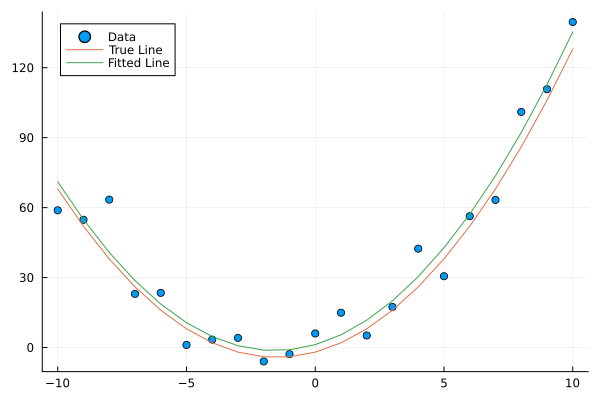

In [9]:
scatter(x, y_observed, label = "Data")
plot!(x, y_true, label = "True Line")

fit_coeff = coeffs(fit(x, y_observed, 2))
y_fit = fit_coeff[1] .+ (fit_coeff[2] .* x) .+ (fit_coeff[3] .* (x.^2))

plot!(x, y_fit, label = "Fitted Line")

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

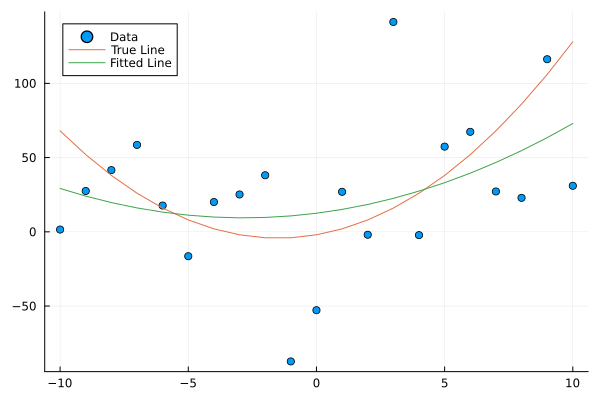

In [10]:
d2 = di.Normal(0, 50)
y_observed2 = y_true .+ rand(d2,length(x))

scatter(x, y_observed2, label = "Data")
plot!(x, y_true, label = "True Line")

fit_coeff2 = coeffs(fit(x, y_observed2, 2))
y_fit2 = fit_coeff2[1] .+ (fit_coeff2[2] .* x) .+ (fit_coeff2[3] .* x.^2)
plot!(x, y_fit2, label = "Fitted Line")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

This plot in 2.4 is not a closer fit to y_true whereas the plot in 2.3 is. This is because the Gaussian noise for the plot in 2.3 has a lower standard deviation. This makes the fitted data to be closer to y_true. The plot in 2.4 had Gaussian noises with a greater standard deviation. This made the fitted curve to be less close to y_true.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


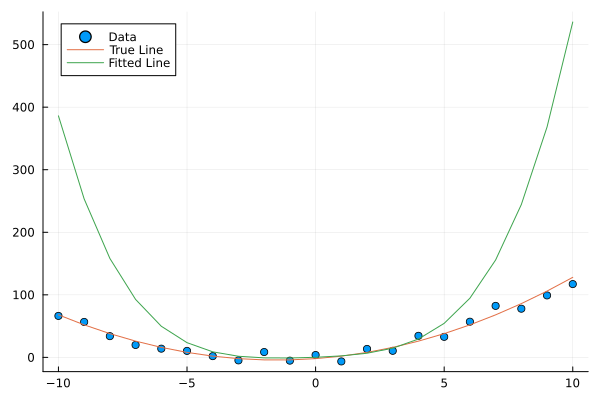

In [13]:
d3 = di.Normal(0, 10)
y_observed3 = y_true .+ rand(d3,length(x))

scatter(x, y_observed3, label = "Data")
plot!(x, y_true, label = "True Line")

fit_coeff3 = coeffs(fit(x, y_observed3, 10))
y_fit3 = fit_coeff3[1] .+ (fit_coeff3[2] .* x) .+ (fit_coeff3[3] .* x.^2) .+ (fit_coeff3[4] .* x.^3) .+ (fit_coeff3[5] .* x.^4)
    .+ (fit_coeff3[6] .* x.^5) .+ (fit_coeff3[7] .* x.^6) .+ (fit_coeff3[8] .* x.^7) .+ (fit_coeff3[9] .* x.^8)
    .+ (fit_coeff3[10] .* x.^9)
plot!(x, y_fit3, label = "Fitted Line")

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


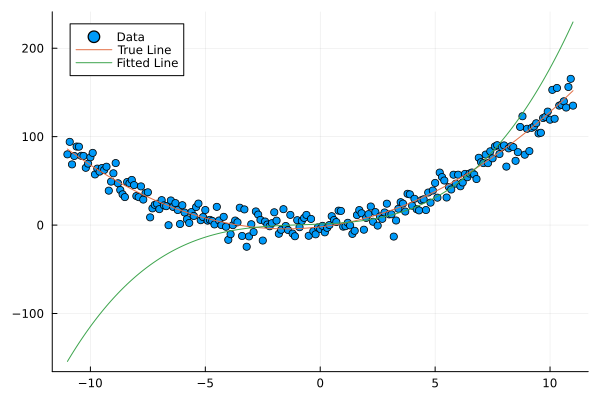

In [19]:
x_fit = -11:0.1:11
y_true4 = (x_fit .^ 2) .+ (3 .* x_fit) .- 2
d4 = di.Normal(0, 10)
y_observed4 = y_true4 .+ rand(d4,length(x_fit))

scatter(x_fit, y_observed4, label = "Data")
plot!(x_fit, y_true4, label = "True Line")

fit_coeff4 = coeffs(fit(x_fit, y_observed4, 10))
y_fit4 = fit_coeff4[1] .+ (fit_coeff4[2] .* x_fit) .+ (fit_coeff4[3] .* x_fit.^2) .+ (fit_coeff4[4] .* x_fit.^3) 
    .+ (fit_coeff4[5] .* x_fit.^4) .+ (fit_coeff4[6] .* x_fit.^5) .+ (fit_coeff4[7] .* x_fit.^6) .+ (fit_coeff4[8] .* x_fit.^7) 
    .+ (fit_coeff4[9] .* x_fit.^8) .+ (fit_coeff4[10] .* x_fit.^9)
plot!(x_fit, y_fit4, label = "Fitted Line")

3. What do you observe in the plot? What is this phenomenon called?

The fitted line is not very close to the true line. It looks like the fitted line only seems to represent only the data at the center of the curve but not the data to the left or right of curve's center. This phenomenon is called overfitting.